### Load Data

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
## Reading the dataset
path = '../DSfinalProject/data'
os.listdir(path)
sales_data = pd.read_csv(path+'/sales_train.csv')
item_cat = pd.read_csv(path+'/item_categories.csv')
items = pd.read_csv(path+'/items.csv')
shops = pd.read_csv(path+'/shops.csv')
sample_submission = pd.read_csv(path+'/sample_submission.csv')
test = pd.read_csv(path+'/test.csv')

### Data Description
- ID - an Id that represents a (Shop, Item) tuple within the test set;

- shop_id - unique identifier of a shop;

- item_id - unique identifier of a product;

- item_category_id - unique identifier of item category;

- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure;

- item_price - current price of an item;

- date - date in format dd/mm/yyyy;

- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33;

- item_name - name of item;

- shop_name - name of shop;

- item_category_name - name of item category.

In [3]:
#total sales per month  (by summing the item counts per day)
sales_data_month = sales_data.groupby('date_block_num',as_index=False)['item_cnt_day'].sum()
sales_data_month.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


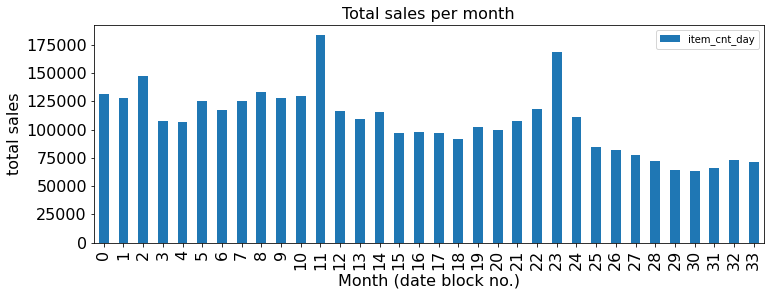

In [4]:
#visualize the total sales pattern per month
import matplotlib.pyplot as plt
sales_data_month.plot.bar(x='date_block_num', y = 'item_cnt_day', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month (date block no.)', fontsize = 16)
plt.ylabel('total sales', fontsize = 16)
plt.title("Total sales per month", fontsize = 16);

In [5]:
#total income calculation
sales_data['sales_income'] = sales_data['item_price'] * sales_data['item_cnt_day']
sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales_income
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00


In [6]:
#total sales per month (considering the item price)
monthly_sales_price = sales_data.groupby(['date_block_num'],as_index=False)['sales_income'].sum()
monthly_sales_price.head()

,date_block_num,sales_income
0,0,9.194709e+07
1,1,9.066571e+07
2,2,1.049327e+08
3,3,6.915429e+07
4,4,6.506531e+07


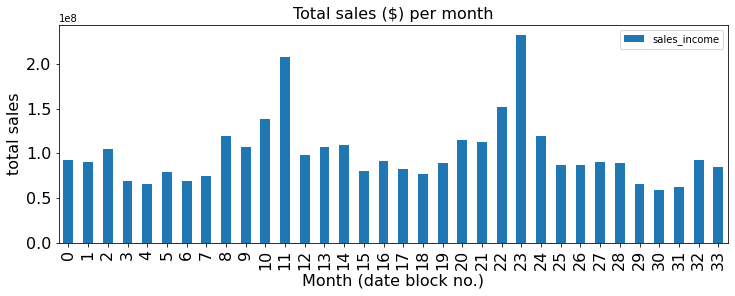

In [7]:
## visualize the total sales to see the pattern per month
import matplotlib.pyplot as plt
monthly_sales_price.plot.bar(x='date_block_num', y = 'sales_income', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month (date block no.)', fontsize = 16)
plt.ylabel('total sales', fontsize = 16)
plt.title("Total sales ($) per month", fontsize = 16);

### Merge Dataset

In [8]:
#items+items_category
item_merge = items.join(item_cat.set_index('item_category_id'),on='item_category_id')
#shops+sales_data
shops_sales = sales_data.join(shops.set_index('shop_id'),on='shop_id')
#merge above two df
train = shops_sales.join(item_merge.set_index('item_id'),on='item_id')

In [9]:
test = test.join(item_merge.set_index('item_id'),on='item_id')
test = test.join(shops.set_index('shop_id'),on='shop_id')

### Each year condition

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '26.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '22.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '17.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.06.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.06.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.06.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19.06.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '20.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23.10.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.10.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '20.10.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.10.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '22.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.09.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '17.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.07.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.07.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23.07.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '17.07.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '20.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19.12.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '26.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28.04.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.10.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27.10.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '26.10.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.10.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.03.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18.03.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.03.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23.03.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.08.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30.08.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24.08.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28.08.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.01.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24.01.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.01.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '17.01.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '22.09.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28.09.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19.09.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18.09.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '24.02.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.06.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15.12.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '22.12.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.12.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18.12.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '27.05.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '26.05.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28.05.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.05.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31.10.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '23.10.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '21.10.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '26.10.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '18.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '25.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\yuanhsu\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '19.04.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

C:\Users\yuanhsu\AppData\Local\Temp\ipykernel_21572\744178645.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['week'] = pd.DatetimeIndex(train['date']).week
C:\Users\yuanhsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

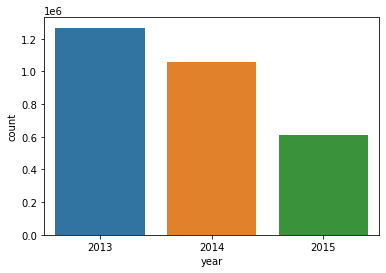

In [10]:
import seaborn as sns
train['year'] = pd.DatetimeIndex(train['date']).year
train['month'] = pd.DatetimeIndex(train['date']).month
train['day'] = pd.DatetimeIndex(train['date']).day
train['week'] = pd.DatetimeIndex(train['date']).week
sns.countplot(train['year'])

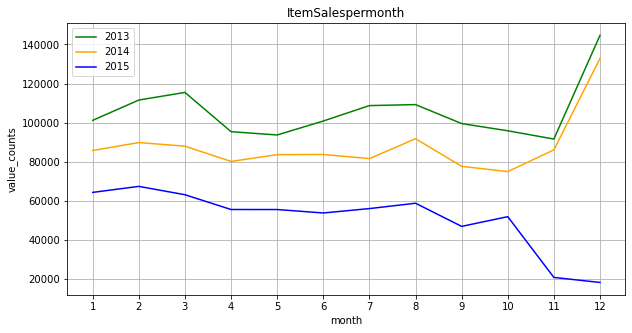

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks([i for i in range(1,13)])
train.groupby(train[train['year']==2013].month).count()['item_id'].plot(ax=ax, label=2013, color='green')
train.groupby(train[train['year']==2014].month).count()['item_id'].plot(label=2014, color='orange')
train.groupby(train[train['year']==2015].month).count()['item_id'].plot(label=2015, color='blue')
plt.grid("on")
plt.ylabel('value_counts')
plt.title("ItemSalespermonth")
plt.legend()
#2013 has the most sales in all three year

### Each shops

In [12]:
train.groupby(train['shop_id']).agg({'item_cnt_day': 'sum'}).mean()

item_cnt_day    60803.433333
dtype: float64

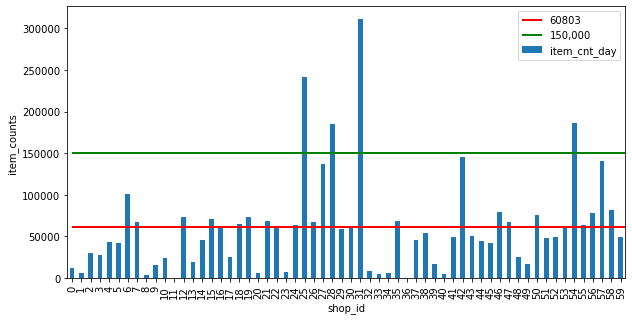

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
train.groupby(train['shop_id']).agg({'item_cnt_day': 'sum'}).plot.bar(ax=ax)
y_avg = train.groupby(train['shop_id']).agg({'item_cnt_day': 'sum'}).mean()
ax.hlines(y_avg, xmin=0, xmax=60, linewidth=2, color='r',label='60803')
ax.hlines(150000, xmin=0, xmax=60, linewidth=2, color='g',label='150,000')
plt.ylabel('item_counts')
plt.legend()

### EDA items 

Text(0, 0.5, 'value_counts')

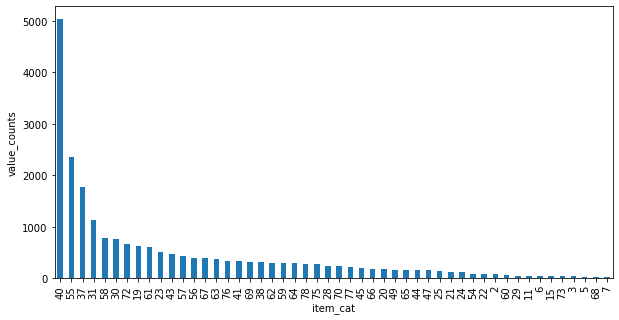

In [14]:
#largest number of "item_name" is item_id = 40
fig, ax = plt.subplots(figsize=(10,5))
items.item_category_id.value_counts().iloc[:50].plot.bar(ax=ax)
plt.xlabel('item_cat')
plt.ylabel('value_counts')

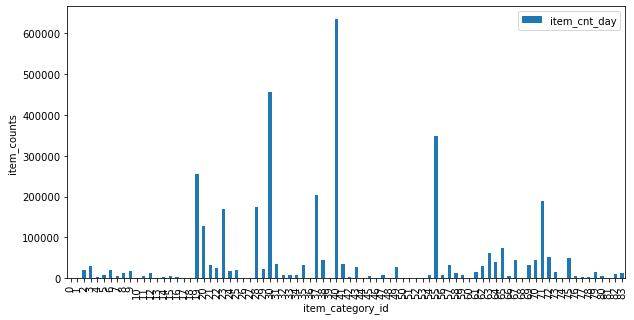

In [15]:
#item category
fig, ax = plt.subplots(figsize=(10,5))
train.groupby(train['item_category_id']).agg({'item_cnt_day': 'sum'}).plot.bar(ax=ax)
y_avg = train.groupby(train['item_category_id']).agg({'item_cnt_day': 'sum'}).mean()
plt.ylabel('item_counts')
plt.legend()

C:\Users\yuanhsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


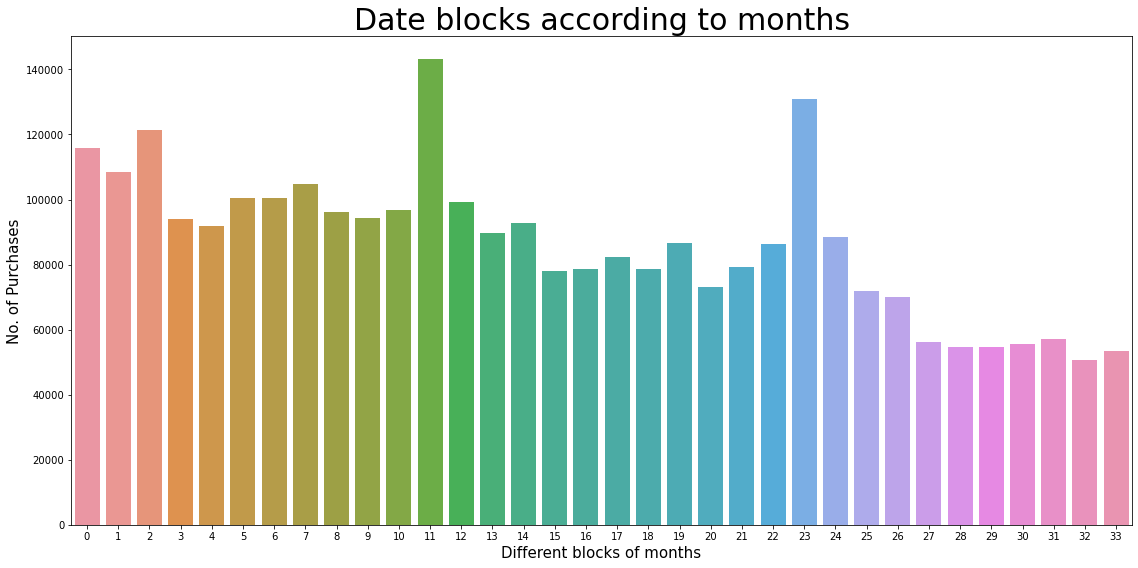

In [16]:
# having a look at the distribution of item sold per date block

plt.rcParams['figure.figsize'] = (19, 9)
sns.countplot(train['date_block_num'])
plt.title('Date blocks according to months', fontsize = 30)
plt.xlabel('Different blocks of months', fontsize = 15)
plt.ylabel('No. of Purchases', fontsize = 15)
plt.show()

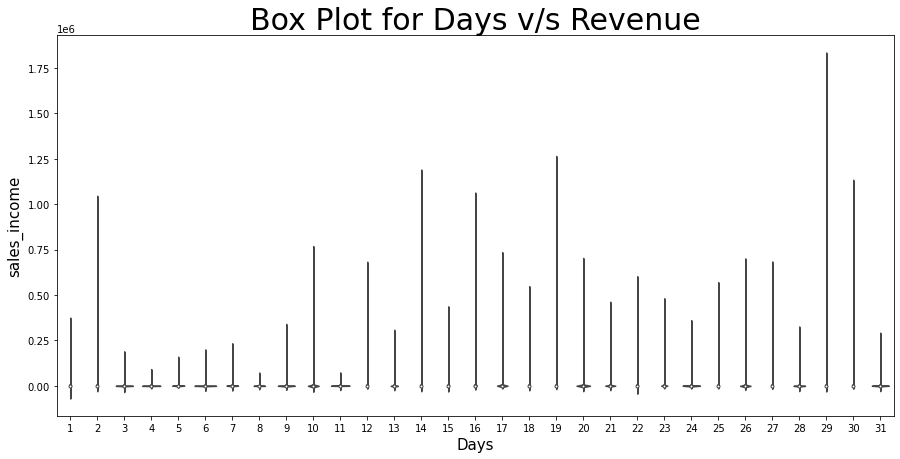

In [17]:
# plotting a box plot for itemprice and item-cnt-day day

plt.rcParams['figure.figsize'] = (15, 7)
sns.violinplot(x = train['day'], y = train['sales_income'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('sales_income', fontsize = 15)
plt.show()

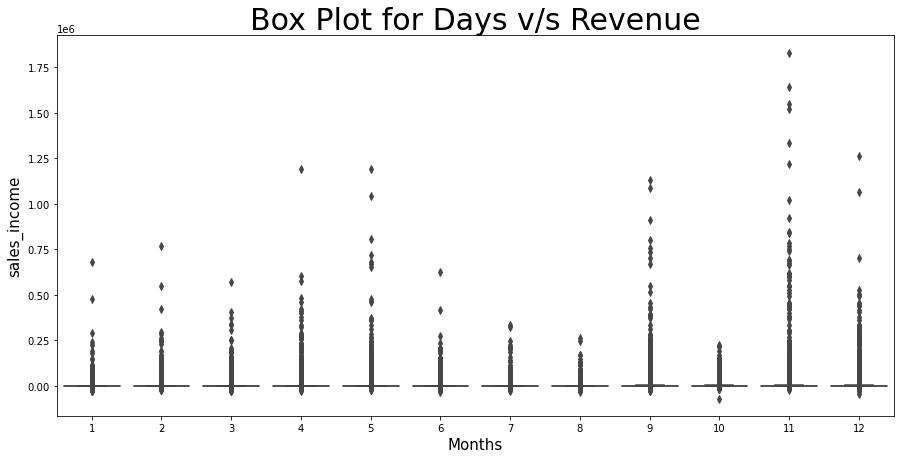

In [18]:
# plotting a box plot for itemprice and item-cnt-day month

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = train['month'], y = train['sales_income'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('sales_income', fontsize = 15)
plt.show()

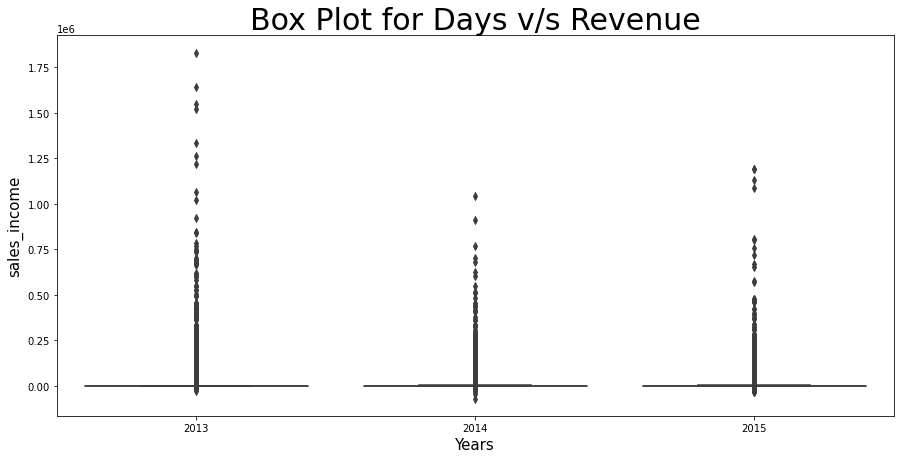

In [19]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = train['year'], y = train['sales_income'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('sales_income', fontsize = 15)
plt.show()